# Content
Steps:
  1. Apply Standard Scaling (For set mean in center (0,0))
  2. Find the Covariance Matrix
  3. Find the `Eigen Value` and `Eigen Vector` of Matrix
  4. Select the Top column whoose i need
  5. Shift data into new Coordinate

# Library import

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create Dataset

In [17]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 80)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

# df = df.sample(40)
df_cpy = df.copy()

In [18]:
df.shape, df_cpy.shape

((100, 4), (100, 4))

In [19]:
df.sample(5)

,feature1,feature2,feature3,target
72,-0.851536,-0.046450,-0.024273,1
19,-0.992574,-0.161346,1.192404,1
34,-0.822939,-1.598109,0.226512,1
14,0.420623,0.411620,-0.071324,1
56,-0.238923,-0.537399,-1.768855,1


In [20]:
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

# Step_1: Apply standard scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

# Step 2: Find Covariance Matrix

In [22]:
df.cov()

,feature1,feature2,feature3,target
feature1,1.010101,0.243307,-0.088731,-0.168156
feature2,0.243307,1.010101,-0.128882,-0.133890
feature3,-0.088731,-0.128882,1.010101,-0.092596
target,-0.168156,-0.133890,-0.092596,0.161616


In [23]:
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.01010101  0.24330715 -0.08873071]
 [ 0.24330715  1.01010101 -0.12888206]
 [-0.08873071 -0.12888206  1.01010101]]


# Step 3: Finding `Eigen Values` and `Eigen Vector`

In [24]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [25]:
eigen_vectors

array([[-0.62020723, -0.66806578,  0.41113393],
       [-0.65145989,  0.73061478,  0.20445552],
       [ 0.43697026,  0.14103248,  0.88835063]])

In [26]:
eigen_values

array([1.32818426, 0.7627453 , 0.93937347])

# Plot these Vectors

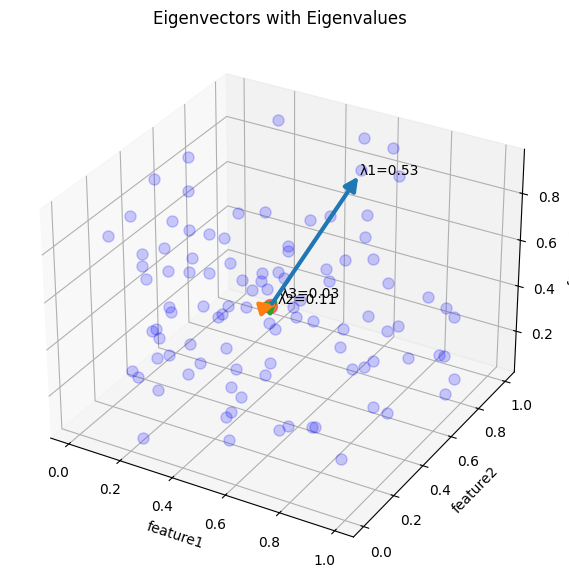

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

# Sample Data (replace with your actual data)
data = {'feature1': np.random.rand(100), 'feature2': np.random.rand(100), 'feature3': np.random.rand(100)}
df = pd.DataFrame(data)

# Sample Eigenvectors (replace with your actual eigenvectors)
eigen_vectors = np.random.rand(3, 3)  # 3 eigenvectors in columns
eigen_values = np.random.rand(3) # sample eigen values.

# Calculate the mean of the data
mean_x, mean_y, mean_z = df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

# Scale eigenvectors by eigenvalues
scaled_eigen_vectors = eigen_vectors * eigen_values

for i, v in enumerate(scaled_eigen_vectors.T):
    a = Arrow3D([mean_x, mean_x + v[0]], [mean_y, mean_y + v[1]], [mean_z, mean_z + v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color=f"C{i}")  # Use different colors
    ax.add_artist(a)
    ax.text(mean_x + v[0], mean_y + v[1], mean_z + v[2], f"λ{i+1}={eigen_values[i]:.2f}") # add eigen value text.

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')

plt.title('Eigenvectors with Eigenvalues')
plt.show()

# Step 4: Make 3D-2D, so Select Top(Maximum value) vectors

In [28]:
pc = eigen_vectors[0:2]
pc

array([[0.43111681, 0.21856156, 0.77577117],
       [0.34109052, 0.0720477 , 0.94030656]])

# Step 5: Shift these data into new Co-Ordinate
1. Law = U<sup>T</sup>. X <br>
- Here,
    - X = DataFrame's Features `(100, 3)` <br>
    - U = Eigen Vector `(2, 3)`
- Transpose of U<sup>T</sup> = `(3, 2)`
- Multiple with `(100, 3) X (3, 2)`
- New Matrix shape `(100, 2)`

In [29]:
df.iloc[:,0:3].shape, pc.shape

((100, 3), (2, 3))

In [30]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df_cpy['target'].values
new_df.head()

,PC1,PC2,target
0,0.626218,0.511744,1
1,0.254230,0.237978,1
2,0.661650,0.683485,1
3,1.034757,1.007753,1
4,0.481968,0.384381,1


# See new data with features

In [31]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [32]:
df

,feature1,feature2,feature3
0,0.749823,0.576685,0.228051
1,0.193003,0.182244,0.169111
2,0.422557,0.216816,0.556982
3,0.805099,0.520420,0.739808
4,0.857694,0.229012,0.080112
...,...,...,...
95,0.512272,0.992626,0.913319
96,0.123434,0.998705,0.469441
97,0.317866,0.973514,0.508607
98,0.928264,0.807172,0.198382
